# <center>DefineBathymetryBasins Introduction</center>
This jupyter-notebook is used to show how ExoCcycle classes, functions, and methods are used to generate carbon cycle bathymetry parameters given a created bathymetry model.


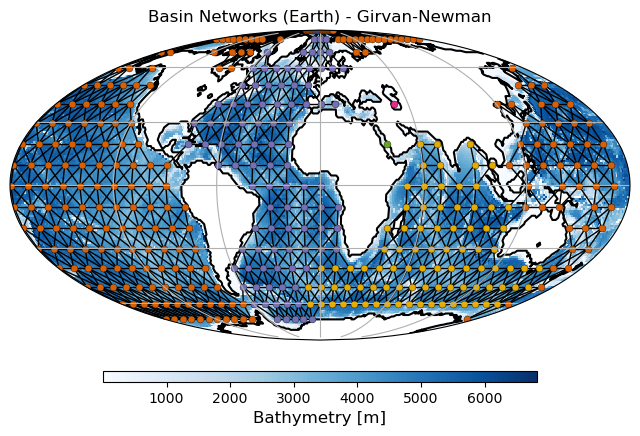
<center>Figure 1: Earth Etopo1 bathymetry overlain by 10 degree resolution ocean graph of nodes that are connected adjacent and diagonally. Nodes are divided into communities using the Girvan-Newman algorithm and color coated respectively.</center>
<br>
<br>

#### <center>What this jupyter notebooks does:</center>

1. Loads previously created bathymetry models.
2. Defines basins using a community detection algorithms, Louvain is the most appropriate for this scale of analysis.
3. Visualizes basins created by the cummunity detection algorithm.
4. Merge basins and visualize the merger process.
5. Visualize the end product of merged basins overlaying the bathymetry model.
6. Calculate bathymetry parameters used in Earth System models<br>
    i. v1<br>
    ii. v2<br>
    iii. <br>
    iv. <br>
    v. <br>
    vi. <br>
7. Visualize the end product of merged basins bathymetry distributions.
8. Calculates basin connectivity parameters used to determine mixing/circulation between basins<br>
    i. <br>
    ii. <br>
    iii. <br>
9. Visualize the end product of connective basin bathymetry overlaying merged basins.
10. Visualize the end product of connective basin bathymetry distributions.


#### Q&A
1. What does a [Some function/function/method] do? Use python's built-in help function on the library's functions/classes. All documentation has been written for these functions/classes.


#### Steps to finish JN and contents:
1. Create figure of global basinIDs and basin bathymetry distributions
2. Add area weights to calculation of bathymetry distributions for basin connections.
3. Make bathymetry distributions for basin connections saved in new netCDF4 file.
4. Add figures to markdown

## <center>How to Create Basin Communities & Merge them: 1-5</center>

Notes:
1. minBasinCnt is only used for the Girvan-Newman method of community detection. Note that this method is exceptionally expensive and not practical. The Louvain community (basin) detection method is the standard for these JB.
2. mergeBasins write argument is set to False, such that the basin ID are not overwritten. This would effect analysis in the next cell. This is only a JN design choice and uses can implement this library's functions how they wish.  
3. Plots are shown on a Mercator projection since it easily allows users to identify where basin are located.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42216/42216 [00:13<00:00, 3054.59it/s]


Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.


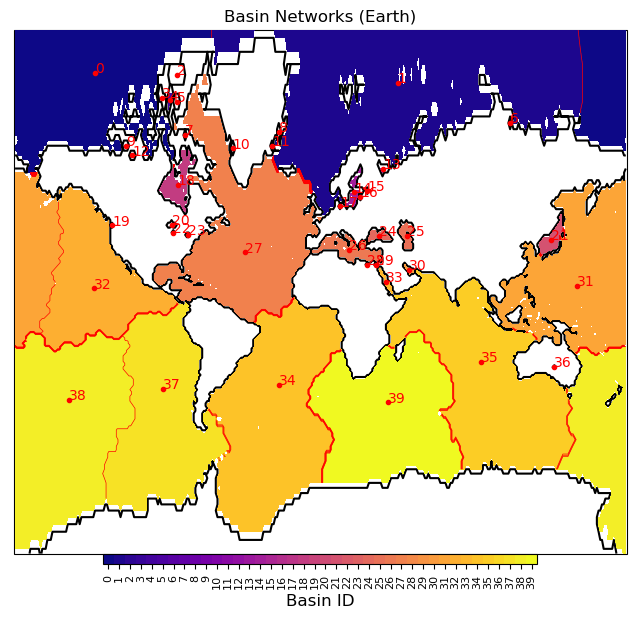

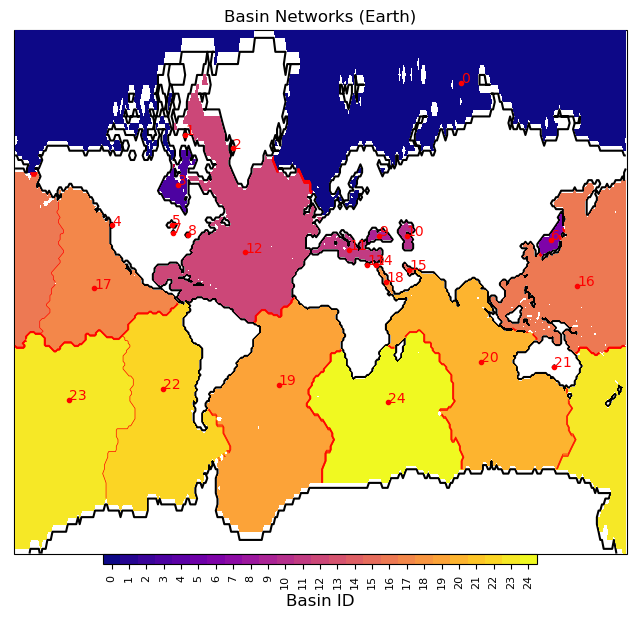

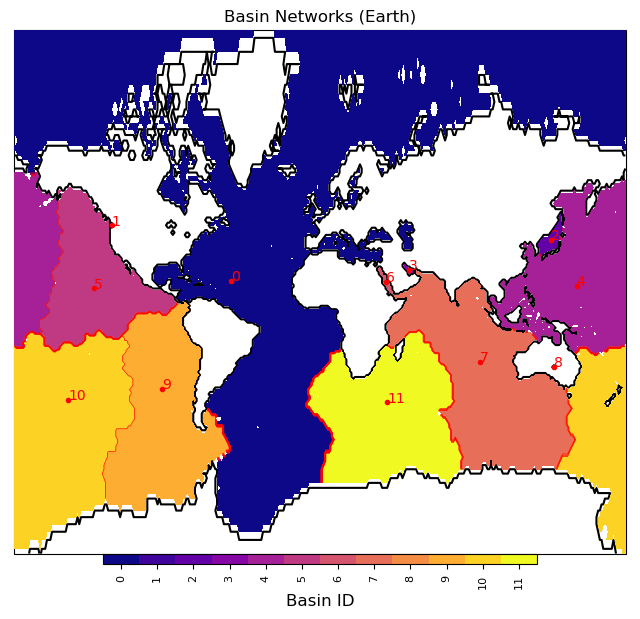

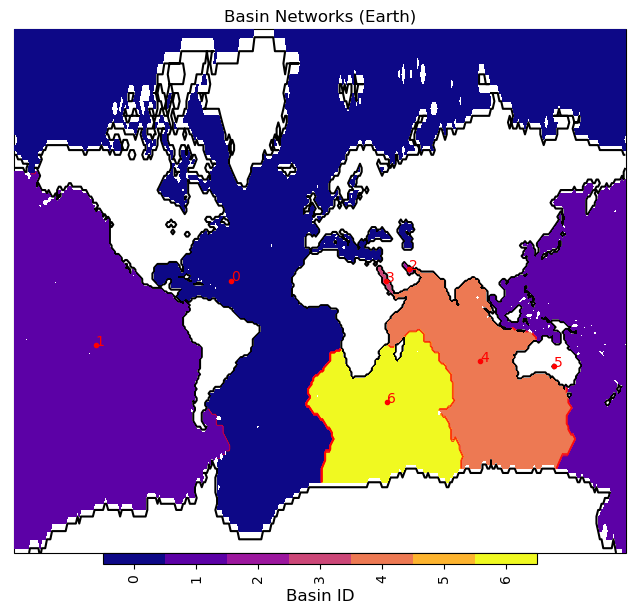

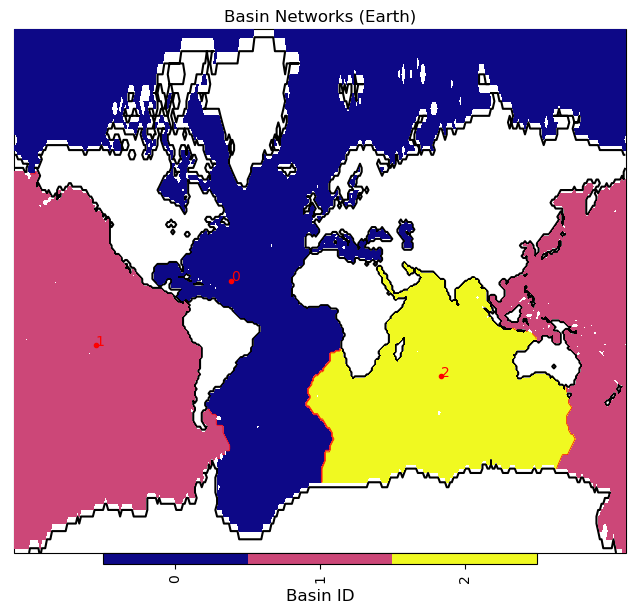

In [3]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np


# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.Basins(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=False,
                    write=True,
                    verbose=False)


# Plot resulting basins with bathymetry and connections
# Note that periodic connections are not graphically shown,
# but are represented in the node network.
# Note that plotting connectors for high resolution take a very
# long time. Suggestion: set draw["connectors"] to false to speed
# up visualizeCommunities.
# Note that basin visualization might be easier for Mercator
# projection with bathymetry and gridlines unplotted.
blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mercator"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "bathymetry":False,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)


# Merge basins north of Atlantic
basins.mergeBasins(0,[1,2,3,4,5,6,8,9,11,12,13,14,15,16,17], write=False)

# Plot again
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mercator"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "bathymetry":False,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)

# Merge basins north of Atlantic with Atlantic.
# Note the new basinIDs
basins.mergeBasins(0,[1,2,3,5,7,8,9,10,11,12,13,14,19], write=False)


# Plot again
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mercator"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "bathymetry":False,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)


# Merge basins for Pacific ocean.
# Note the new basinIDs
basins.mergeBasins(1,[2,4,5,9,10], write=False)


# Plot again
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mercator"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "bathymetry":False,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)


# Merge basins for Indian ocean.
# Note the new basinIDs
basins.mergeBasins(2,[3,4,5,6], write=False)

basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mercator"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "bathymetry":False,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)


## <center>Read network, merge basins, and plot merged basins: 5</center>

Notes :
1. A seed is used for the Louvain algorithm and we read in the network created above, so we can merge the same basin IDs as above to recreate the same 3 basin system.
2. The network is not save with updated basin IDs.


Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.


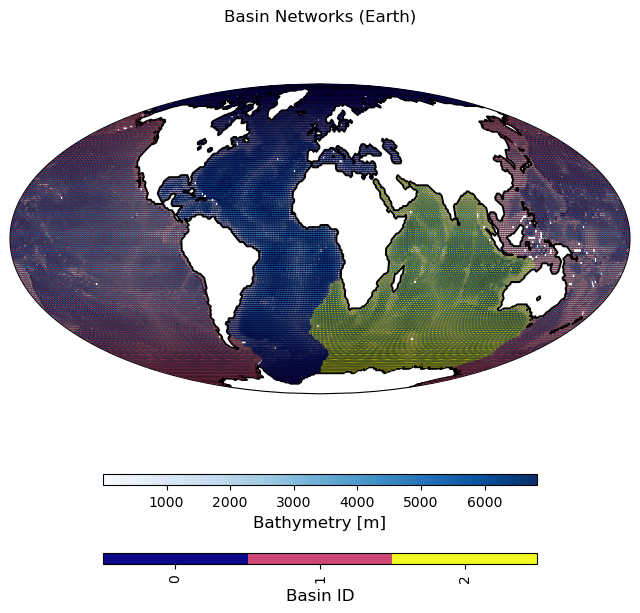

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np


# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.Basins(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=True,
                    write=False,
                    verbose=False)


# Merge basins north of Atlantic
basins.mergeBasins(0,[1,2,3,4,5,6,8,9,11,12,13,14,15,16,17], write=False)

# Merge basins north of Atlantic with Atlantic.
# Note the new basinIDs
basins.mergeBasins(0,[1,2,3,5,7,8,9,10,11,12,13,14,19], write=False)

# Merge basins for Pacific ocean.
# Note the new basinIDs
basins.mergeBasins(1,[2,4,5,9,10], write=False)

# Merge basins for Indian ocean.
# Note the new basinIDs
basins.mergeBasins(2,[3,4,5,6], write=False)

# Plot resulting basins with bathymetry and connections
# Note that periodic connections are not graphically shown,
# but are represented in the node network.
# Note that plotting connectors for high resolution take a very
# long time. Suggestion: set draw["connectors"] to false to speed
# up visualizeCommunities.
# Note that basin visualization might be easier for Mercator
# projection with bathymetry and gridlines unplotted.
blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mollweide"},
                             draw={"nodes":True,
                                   "connectors":False,
                                   "bathymetry":True,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":False},
                             saveSVG=False,
                             savePNG=False)


## <center>Calculate Basin Parameters and Basin Connectivity Parameters and Save them to a new NetCDF4 file: 6-10</center>


Notes:

1. If uses run the the saveCcycleParameter method without previously calculating basin connectivity parameters with the calculateBasinConnectivityParameters method, then connectivity parameters will not be saved to the new netCDF4 file. 

Bin edges used:
 [0.  0.1 0.6 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.5]
Bathymetry area distribution excluding high latitude bathymetry:

[ 6.16520097  4.21836263  1.34222893  2.09583669  2.69623424  3.65992849
  5.82394415  9.1289485  12.28137854 15.17748949 16.6401197  15.21144235
  5.55888533]
[ 3.53202334  2.34478679  1.09763396  1.98286084  2.14287076  2.83422735
  4.52116783  9.30404202 13.98706827 16.43573398 15.82216226 15.72779435
 10.26762826]
[ 3.15075869  2.01750267  1.03770744  1.69141995  2.48224392  3.98344139
  6.17014366 10.59406076 14.55715073 19.10611801 18.61113976 12.86958291
  3.72873011]


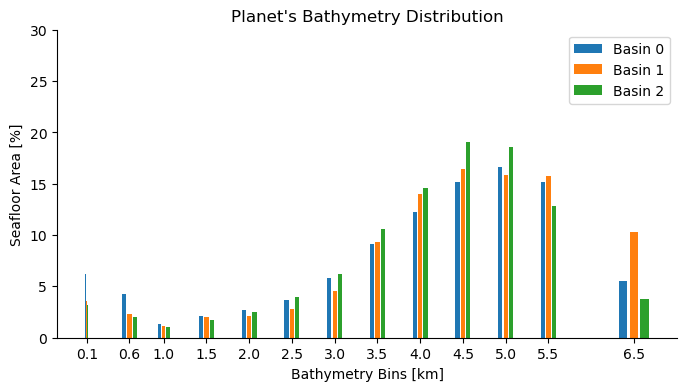

In [3]:
# Calculate basin bathymetry parameters
basins.calculateBasinParameters(verbose=True)

# Calculate basin connectivity parameters
#basins.calculateBasinConnectivityParameters(verbose=True)

# Expand original bathymetry netCDF4 file by writting a new basin bathymetry
# netCDF4 file that also contains basin bathymetry parameters.
#basins.saveCcycleParameter();


## <center>Other plotting Choices</center>

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42216/42216 [00:12<00:00, 3350.75it/s]


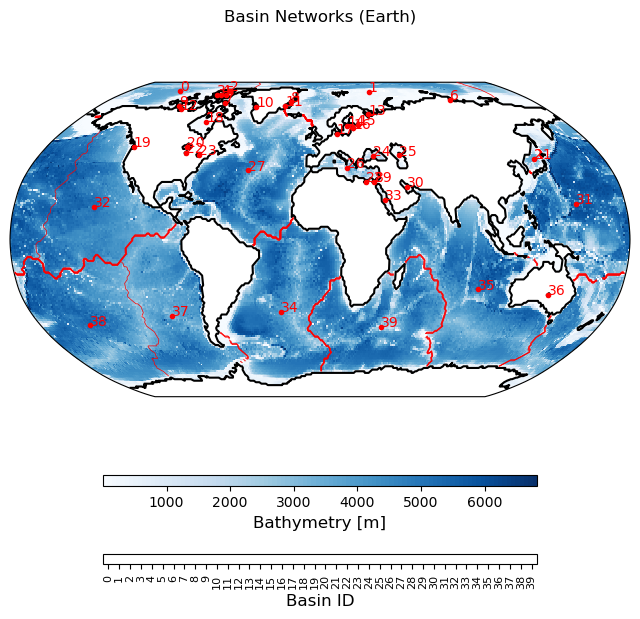

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np


# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.Basins(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":1},
                    read=True,
                    write=False,
                    verbose=False)


# Plot resulting basins with bathymetry and connections
# Note that periodic connections are not graphically shown,
# but are represented in the node network.
# Note that plotting connectors for high resolution take a very
# long time. Suggestion: set draw["connectors"] to false to speed
# up visualizeCommunities.
# Note that basin visualization might be easier for Mercator
# projection with bathymetry and gridlines unplotted.
blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Robinson"},
                             draw={"nodes":False,
                                   "connectors":False,
                                   "bathymetry":True,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":True},
                             saveSVG=False,
                             savePNG=True)


